In [1]:
import tensorflow as tf
from tensorflow import keras
import keras
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('iris.csv')

In [3]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.drop('Id', axis=1, inplace=True)

In [5]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
X = df.loc[:, df.columns != 'Species']
y = df.loc[:, ['Species']]

In [7]:
y_enc = LabelEncoder().fit_transform(y)
y_label = tf.keras.utils.to_categorical(y_enc)

D:\Anaconda\envs\TensorFlow\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y_label, test_size=0.4, random_state=42)

In [9]:
print(f"Train shape : {X_train.shape}, Y Train : {y_train.shape}")
print(X_train.shape[1:])

Train shape : (90, 4), Y Train : (90, 3)
(4,)


In [10]:
def create_model():
  return tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(4,), name='Input'),
    tf.keras.layers.Dense(150, activation='relu', name='Hidden_Layer_1'),
    tf.keras.layers.Dense(50, activation='relu', name='Hidden_Layer_2'),
    tf.keras.layers.Dense(3, activation='softmax', name='Output'),
  ])

In [11]:
model = create_model()
model.compile(optimizer='adam', 
              loss=keras.losses.CategoricalCrossentropy(),
             metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (Flatten)             (None, 4)                 0         
                                                                 
 Hidden_Layer_1 (Dense)      (None, 150)               750       
                                                                 
 Hidden_Layer_2 (Dense)      (None, 50)                7550      
                                                                 
 Output (Dense)              (None, 3)                 153       
                                                                 
Total params: 8,453
Trainable params: 8,453
Non-trainable params: 0
_________________________________________________________________


In [13]:
history = model.fit(X_train, y_train, epochs=30)

Epoch 1/30
3/3 [==============================] - 2s 5ms/step - loss: 1.1691 - accuracy: 0.3556
Epoch 2/30
3/3 [==============================] - 0s 5ms/step - loss: 0.9805 - accuracy: 0.5778
Epoch 3/30
3/3 [==============================] - 0s 5ms/step - loss: 0.9108 - accuracy: 0.6333
Epoch 4/30
3/3 [==============================] - 0s 4ms/step - loss: 0.8521 - accuracy: 0.9333
Epoch 5/30
3/3 [==============================] - 0s 5ms/step - loss: 0.7989 - accuracy: 0.7000
Epoch 6/30
3/3 [==============================] - 0s 5ms/step - loss: 0.7458 - accuracy: 0.6556
Epoch 7/30
3/3 [==============================] - 0s 6ms/step - loss: 0.6978 - accuracy: 0.7000
Epoch 8/30
3/3 [==============================] - 0s 5ms/step - loss: 0.6519 - accuracy: 0.8222
Epoch 9/30
3/3 [==============================] - 0s 5ms/step - loss: 0.6131 - accuracy: 0.9111
Epoch 10/30
3/3 [==============================] - 0s 5ms/step - loss: 0.5795 - accuracy: 0.9000
Epoch 11/30
3/3 [======================

In [14]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 4ms/step - loss: 0.2109 - accuracy: 0.9833


[0.21086443960666656, 0.9833333492279053]

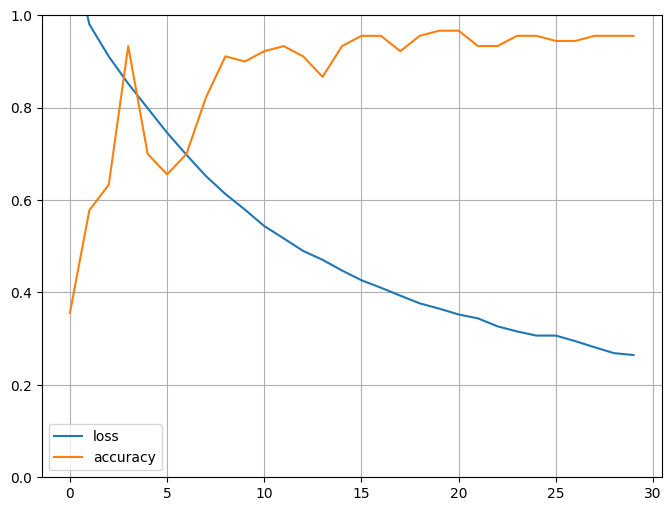

In [15]:
pd.DataFrame(history.history).plot(figsize=(8,6))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [16]:
predict_y = model.predict(X_test)

2/2 [==============================] - 0s 4ms/step


In [17]:
predict_y

array([[8.5077183e-03, 6.1406130e-01, 3.7743101e-01],
       [9.7144878e-01, 2.6849968e-02, 1.7011377e-03],
       [1.6090116e-05, 4.5564719e-02, 9.5441920e-01],
       [1.0561081e-02, 5.6922770e-01, 4.2021120e-01],
       [6.4704730e-03, 6.9987857e-01, 2.9365095e-01],
       [9.5946485e-01, 3.7662446e-02, 2.8727094e-03],
       [6.1128486e-02, 7.7181453e-01, 1.6705698e-01],
       [2.1646912e-03, 3.2239065e-01, 6.7544466e-01],
       [3.7293397e-03, 5.0550395e-01, 4.9076670e-01],
       [2.8598690e-02, 7.7824098e-01, 1.9316043e-01],
       [3.1786584e-03, 3.3815902e-01, 6.5866226e-01],
       [9.4550025e-01, 5.0000828e-02, 4.4989344e-03],
       [9.7168744e-01, 2.6435228e-02, 1.8772709e-03],
       [9.4687861e-01, 4.8972528e-02, 4.1489368e-03],
       [9.7175455e-01, 2.6076309e-02, 2.1691213e-03],
       [1.2933115e-02, 6.0831064e-01, 3.7875623e-01],
       [2.6427486e-04, 9.1557555e-02, 9.0817815e-01],
       [2.3066700e-02, 7.4399281e-01, 2.3294047e-01],
       [1.0307359e-02, 5.386

In [18]:
predict_class = np.argmax(predict_y, axis=1)

In [19]:
predict_class

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 2, 2, 1, 2, 1, 2, 2, 0, 2, 1, 0, 0, 0, 1], dtype=int64)

In [21]:
new_values, y_values = X_test[:10], y_test[:10]

y_prob = model.predict(new_data)

print(f"Actual values : {y_values}")

for pred in y_prob:
    print(np.argmax(pred))

1/1 [==============================] - 0s 25ms/step
Actual values : [[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]]
1
0
2
1
1
0
1
2
1
1


In [23]:
model.save('Iris_model.keras')